In [40]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [42]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [43]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [44]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(q="Bitcoin",language="en")

In [45]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

In [46]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin_news_en["articles"])

bitcoin_df.head()

,author,content,description,publishedAt,source,title,url,urlToImage
0,Jack Morse,J.K. Rowling has been drinking a lot and you'd...,J.K. Rowling has been drinking a lot and you'd...,2020-05-16T00:34:00Z,"{'id': 'mashable', 'name': 'Mashable'}",J.K. Rowling is four cocktails in and talking ...,https://mashable.com/article/jk-rowling-asked-...,https://mondrian.mashable.com/2020%252F05%252F...
1,Shoshana Wodinsky,"Yesterday, the prominent bitcoin investor Mich...","Yesterday, the prominent bitcoin investor Mich...",2020-05-08T22:21:00Z,"{'id': None, 'name': 'Gizmodo.com'}",Teenager Accused of Leading Ring of 'Evil Geni...,https://gizmodo.com/teenager-accused-of-leadin...,https://i.kinja-img.com/gawker-media/image/upl...
2,Stan Schroeder,"Early next week, Bitcoin is about to experienc...","Early next week, Bitcoin is about to experienc...",2020-05-08T09:00:00Z,"{'id': 'mashable', 'name': 'Mashable'}",A massive Bitcoin event is coming next week. H...,https://mashable.com/article/bitcoin-halving-2...,https://mondrian.mashable.com/2020%252F05%252F...
3,Alex Wilhelm,Over the last few weeks all eyes in the crypto...,Over the last few weeks all eyes in the crypto...,2020-05-13T15:46:38Z,"{'id': 'techcrunch', 'name': 'TechCrunch'}",FalconX raises $17M to power its crypto tradin...,http://techcrunch.com/2020/05/13/falconx-raise...,https://techcrunch.com/wp-content/uploads/2019...
4,David Murphy,If youre planning to do some protesting and yo...,If you’re planning to do some protesting and y...,2020-06-04T19:00:00Z,"{'id': None, 'name': 'Lifehacker.com'}",How to Buy a Burner Phone,https://lifehacker.com/how-to-buy-a-burner-pho...,https://i.kinja-img.com/gawker-media/image/upl...


In [47]:
# GENERAL function to convert a score to -1 ,0, 1
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [48]:
# given bitcoin_df (raw), calculate sentiment (using VADER)
bitcoin_sent = {
    "compound": [],
    "pos": [],
    "neu": [],
    "neg": [],
    "sent": [],
}
for index, row in bitcoin_df.iterrows():
    try:
        # Sentiment scoring with VADER
        sentiment = analyzer.polarity_scores(row["content"])
        bitcoin_sent["compound"].append(sentiment["compound"])
        bitcoin_sent["pos"].append(sentiment["pos"])
        bitcoin_sent["neu"].append(sentiment["neu"])
        bitcoin_sent["neg"].append(sentiment["neg"])
        bitcoin_sent["sent"].append(get_sentiment(sentiment["compound"]))

    except AttributeError:
        pass

In [49]:
# Create the bitcoin sentiment scores DataFrame
bitcoin_results_df = pd.DataFrame(bitcoin_sent)

In [50]:
# Describe the Bitcoin Sentiment
bitcoin_results_df.describe()

,compound,pos,neu,neg,sent
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.253084,0.071632,0.903368,0.024947,0.473684
std,0.398747,0.051823,0.050314,0.046209,0.841191
min,-0.585900,0.000000,0.812000,0.000000,-1.000000
25%,0.000000,0.044000,0.878000,0.000000,0.000000
50%,0.507000,0.090000,0.910000,0.000000,1.000000
75%,0.507000,0.090000,0.920000,0.029000,1.000000
max,0.801600,0.188000,1.000000,0.134000,1.000000


In [51]:
ethereum_df = pd.DataFrame.from_dict(ethereum_news_en["articles"])
ethereum_df.head()

,author,content,description,publishedAt,source,title,url,urlToImage
0,Henry Pickavet,Editors note:Andreessen Horowitzs Crypto Start...,"In week two of a16z’s Crypto Startup School, t...",2020-05-20T19:00:17Z,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Crypto Startup School: How to scale companies ...,http://techcrunch.com/2020/05/20/crypto-startu...,https://techcrunch.com/wp-content/uploads/2020...
1,Lucas Matney,For developers looking to quickly build identi...,For developers looking to quickly build identi...,2020-06-03T22:55:42Z,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Decentralized identity management platform Mag...,http://techcrunch.com/2020/06/03/decentralized...,https://techcrunch.com/wp-content/uploads/2020...
2,Alex Roan,Use this to send Ether from one account to ano...,Web3 bridges the gap between the traditional i...,2020-05-14T11:56:46Z,"{'id': None, 'name': 'Medium'}",Web3 JavaScript Functions for Ethereum DApps,https://medium.com/better-programming/the-top-...,https://miro.medium.com/max/1200/0*jldz3o40zYb...
3,EditorDavid,"Some open-source groups, such as The Linux Fou...","""Thanks to the coronavirus, technology events ...",2020-05-24T18:34:00Z,"{'id': None, 'name': 'Slashdot.org'}",'FOSS Responders' Want to Help Open-Source Gro...,https://news.slashdot.org/story/20/05/23/23512...,https://a.fsdn.com/sd/topics/opensource_64.png
4,Shailee Adinolfi,With unemployment surging and businesses strug...,The federal government desperately needs to ta...,2020-05-12T13:00:00Z,"{'id': 'wired', 'name': 'Wired'}",The US Could Deliver Stimulus Checks Faster—Wi...,https://www.wired.com/story/opinion-the-us-cou...,https://media.wired.com/photos/5eb9e08088ead7b...


In [52]:
# GENERAL function to convert a score to -1 ,0, 1
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [53]:
# given ethereum_df (raw), calculate sentiment (using VADER)
ethereum_sent = {
    "compound": [],
    "pos": [],
    "neu": [],
    "neg": [],
    "sent": [],
}
for index, row in ethereum_df.iterrows():
    try:
        # Sentiment scoring with VADER
        sentiment = analyzer.polarity_scores(row["content"])
        ethereum_sent["compound"].append(sentiment["compound"])
        ethereum_sent["pos"].append(sentiment["pos"])
        ethereum_sent["neu"].append(sentiment["neu"])
        ethereum_sent["neg"].append(sentiment["neg"])
        ethereum_sent["sent"].append(get_sentiment(sentiment["compound"]))

    except AttributeError:
        pass

In [54]:
# Describe the Ethereum Sentiment
ethereum_results_df = pd.DataFrame(ethereum_sent)
ethereum_results_df.describe()

,compound,pos,neu,neg,sent
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.208544,0.083125,0.891562,0.025188,0.375000
std,0.379712,0.095304,0.109049,0.044487,0.718795
min,-0.445700,0.000000,0.665000,0.000000,-1.000000
25%,0.000000,0.000000,0.872500,0.000000,0.000000
50%,0.038600,0.061500,0.897500,0.000000,0.500000
75%,0.523225,0.121500,1.000000,0.039250,1.000000
max,0.919800,0.335000,1.000000,0.148000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin had the highest mean, and ethereum had the highest max

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [55]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [56]:
 lemmatizer = WordNetLemmatizer()

In [57]:
# Expand the default stopwords list if necessary
def clean_text(text):
    sw = set(stopwords.words('english'))
    sw = sw.union(set(["fucking","youd", "wh", "wal", "hed", "u", "whats", "acc", "b","add", "day", "since", "narr", "de", "let", "say", "get" ] ))
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lwords = [word.lower() for word in words if word.lower() not in sw]
    
    # Lemmatize Words into root words
    
    lem = [lemmatizer.lemmatize(word) for word in lwords] 
    return lem

In [106]:
btdescription = bitcoin_df["description"].tolist()
bitstring = " ".join(btdescription)
btc_result = clean_text(bitstring)
print(btc_result)

['jk', 'rowling', 'drinking', 'lot', 'better', 'believe', 'thought', 'bitcoinnoted', 'terf', 'author', 'cuckoo', 'calling', 'rowling', 'decided', 'friday', 'perfect', 'time', 'learn', 'cryptocurrency', 'bitcoin', 'like', 'celebrity', 'yesterday', 'prominent', 'bitcoin', 'investor', 'michael', 'terpin', 'announced', 'filed', 'suit', 'ringleader', 'sim', 'swap', 'gang', 'chasing', 'following', 'theft', 'roughly', 'collective', 'million', 'bitcoin', 'digital', 'early', 'next', 'week', 'bitcoin', 'experience', 'thirdever', 'halving', 'hugely', 'important', 'event', 'could', 'shift', 'balance', 'power', 'within', 'network', 'historically', 'event', 'also', 'called', 'halvening', 'drove', 'price', 'bitcoin', 'especially', 'long', 'last', 'week', 'eye', 'crypto', 'world', 'glued', 'halvening', 'nighreligious', 'moment', 'blockchain', 'realm', 'every', 'amount', 'new', 'bitcoin', 'mined', 'distributed', 'miner', 'folk', 'fleet', 'computer', 'powering', 'youre', 'planning', 'protesting', 'dont'

In [59]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    sw = sw.union(set(["fucking","youd", "wh", "wal", "hed", "u", "whats", "acc", "b","add", "day", "since", "narr", "de", "let", "say", "get" ] ))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation

    re_clean = regex.sub('', text)
    
    # Remove the stop words
    words = word_tokenize(re_clean)
    

    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output


In [60]:
ethdescription = ethereum_df["description"].tolist()
ethstring = " ".join(ethdescription)
eth_result = clean_text(ethstring)
print(eth_result)

['week', 'two', 'az', 'crypto', 'startup', 'school', 'three', 'companybuilders', 'provide', 'realworld', 'advice', 'using', 'quality', 'crypto', 'create', 'new', 'business', 'model', 'network', 'developer', 'looking', 'quickly', 'build', 'identity', 'management', 'platform', 'readily', 'available', 'option', 'dont', 'stray', 'far', 'internet', 'biggest', 'datahungry', 'platform', 'magic', 'small', 'sf', 'startup', 'building', 'decentralized', 'blockchainbased', 'web', 'bridge', 'gap', 'traditional', 'internet', 'ethereum', 'blockchain', 'enables', 'user', 'interact', 'dapp', 'browser', 'using', 'javascript', 'front', 'end', 'knowing', 'thanks', 'coronavirus', 'technology', 'event', 'canceled', 'left', 'right', 'writes', 'zdnet', 'turn', 'damaging', 'finance', 'company', 'group', 'depend', 'eventssome', 'opensource', 'group', 'linux', 'foundation', 'deal', 'wit', 'federal', 'government', 'desperately', 'need', 'take', 'cue', 'global', 'humanitarian', 'agency', 'developed', 'quick', 'sec

In [61]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df["description"].apply(tokenizer)
bitcoin_df.describe()

,author,content,description,publishedAt,source,title,url,urlToImage,tokens
count,19,19,20,20,20,20,20,20,20
unique,9,19,20,20,9,20,20,12,20
top,Satoshi Nakaboto,"Early next week, Bitcoin is about to experienc...",Over the last few weeks all eyes in the crypto...,2020-06-04T19:00:00Z,"{'id': 'the-next-web', 'name': 'The Next Web'}",JPMorgan Extends Banking Services To Bitcoin E...,https://www.youtube.com/watch?v=GYoegTF5Qks,https://img-cdn.tnwcdn.com/image/hardfork?filt...,"[ollithe, halving, boost, bitcoin, pricescnbc,..."
freq,8,1,1,1,8,1,1,8,1


In [62]:
# Create a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df["description"].apply(tokenizer)
ethereum_df.describe()

,author,content,description,publishedAt,source,title,url,urlToImage,tokens
count,15,16,20,20,20,20,20,19,20
unique,15,16,20,20,14,20,20,19,20
top,Henry Pickavet,"After Facebook and Telegram, Reddit is the nex...",Over the last few weeks all eyes in the crypto...,2020-06-05T10:17:20Z,"{'id': None, 'name': 'Techmeme.com'}",Satoshi Nakaboto: ‘Bitcoin on its way back to ...,http://techcrunch.com/2020/05/20/crypto-startu...,https://www.tbstat.com/wp/uploads/2020/05/redd...,"[alexander, behrens, decrypttd, ameritradeback..."
freq,1,1,1,1,4,1,1,1,1


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [63]:
from collections import Counter
from nltk import ngrams

In [64]:
bitcoin_df.head()

,author,content,description,publishedAt,source,title,url,urlToImage,tokens
0,Jack Morse,J.K. Rowling has been drinking a lot and you'd...,J.K. Rowling has been drinking a lot and you'd...,2020-05-16T00:34:00Z,"{'id': 'mashable', 'name': 'Mashable'}",J.K. Rowling is four cocktails in and talking ...,https://mashable.com/article/jk-rowling-asked-...,https://mondrian.mashable.com/2020%252F05%252F...,"[jk, rowling, ha, drinking, lot, better, belie..."
1,Shoshana Wodinsky,"Yesterday, the prominent bitcoin investor Mich...","Yesterday, the prominent bitcoin investor Mich...",2020-05-08T22:21:00Z,"{'id': None, 'name': 'Gizmodo.com'}",Teenager Accused of Leading Ring of 'Evil Geni...,https://gizmodo.com/teenager-accused-of-leadin...,https://i.kinja-img.com/gawker-media/image/upl...,"[yesterday, prominent, bitcoin, investor, mich..."
2,Stan Schroeder,"Early next week, Bitcoin is about to experienc...","Early next week, Bitcoin is about to experienc...",2020-05-08T09:00:00Z,"{'id': 'mashable', 'name': 'Mashable'}",A massive Bitcoin event is coming next week. H...,https://mashable.com/article/bitcoin-halving-2...,https://mondrian.mashable.com/2020%252F05%252F...,"[early, next, week, bitcoin, experience, third..."
3,Alex Wilhelm,Over the last few weeks all eyes in the crypto...,Over the last few weeks all eyes in the crypto...,2020-05-13T15:46:38Z,"{'id': 'techcrunch', 'name': 'TechCrunch'}",FalconX raises $17M to power its crypto tradin...,http://techcrunch.com/2020/05/13/falconx-raise...,https://techcrunch.com/wp-content/uploads/2019...,"[last, week, eye, crypto, world, glued, halven..."
4,David Murphy,If youre planning to do some protesting and yo...,If you’re planning to do some protesting and y...,2020-06-04T19:00:00Z,"{'id': None, 'name': 'Lifehacker.com'}",How to Buy a Burner Phone,https://lifehacker.com/how-to-buy-a-burner-pho...,https://i.kinja-img.com/gawker-media/image/upl...,"[youre, planning, protesting, dont, want, risk..."


In [65]:
btc_processed = bitcoin_df["tokens"].tolist()

# Generate the Bitcoin N-grams where N=2


"""MODIFIED BELOW - ADDED FOR LOOP"""

#ADDED THIS LOOP BELOW, BASICALLY WE ARE GETTING THE EACH OF THE LISTS IN THE DATA FRAME UNDER THE TOKENS COLUMN AND MERGING THEM ALL TOGETHER 
#TO ONE BIG ARRAY
btc_processed_merged = []
#combine all lists in tokens columns
for ls in btc_processed:
    btc_processed_merged = btc_processed_merged + ls
    
ngrams(btc_processed, n=2)

<generator object ngrams at 0x00000245897251C8>

In [66]:
eth_processed = ethereum_df["tokens"].tolist()

"""MODIFIED BELOW - ADDED FOR LOOP"""
#ADDED THIS LOOP BELOW, BASICALLY WE ARE GETTING THE EACH OF THE LISTS IN THE DATA FRAME UNDER THE TOKENS COLUMN AND MERGING THEM ALL TOGETHER 
#TO ONE BIG ARRAY
eth_processed_merged = []
for ls in eth_processed:
    eth_processed_merged = eth_processed_merged + ls
# Generate the Ethereum N-grams where N=2
ngrams(eth_processed, n=2)

<generator object ngrams at 0x00000245897258C8>

In [67]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [84]:
# Get the top 10 words for Bitcoin
bitc_count = pd.DataFrame(token_count(btc_processed_merged)).rename(columns = {0: "Words", 1: "Count"})
bitc_count.head(10)

,Words,Count
0,bitcoin,39
1,satoshi,17
2,nakaboto,16
3,every,10
4,past,9
5,robot,8
6,colleague,8
7,writes,8
8,welcome,8
9,another,8


In [69]:
# Get the top 10 words for Ethereum
ethr_count = pd.DataFrame(token_count(eth_processed_merged)).rename(columns = {0: "Words", 1: "Count"})
ethr_count.head(10)

,Words,Count
0,bitcoin,6
1,ha,6
2,crypto,5
3,ethereum,5
4,blockchain,5
5,two,4
6,platform,4
7,first,4
8,startup,3
9,new,3


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

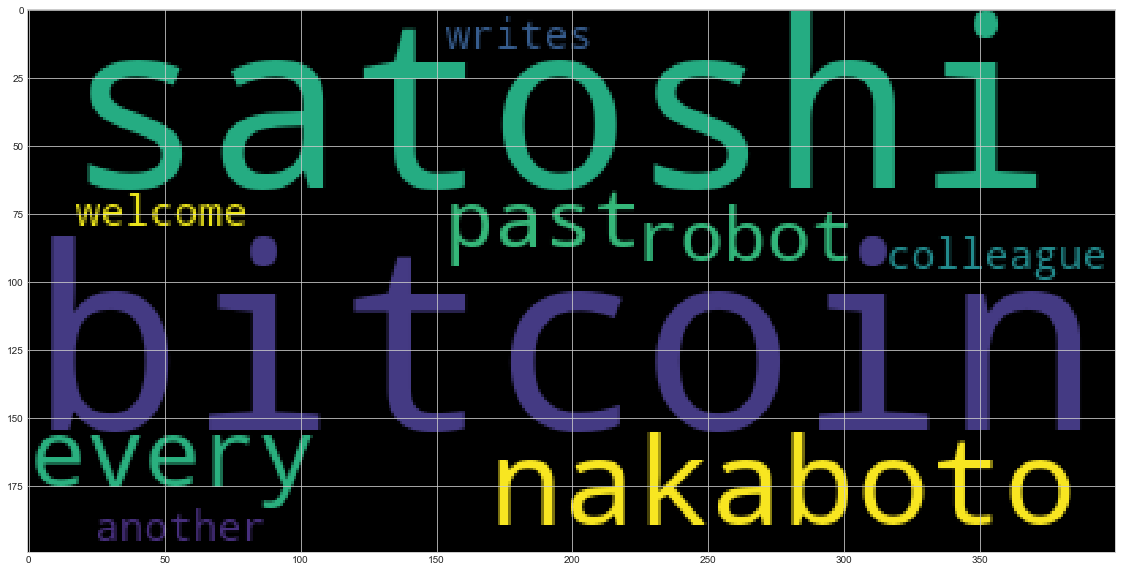

In [89]:
#turn the btc count words into a list a join with an empty space
entities = " ".join(bitc_count["Words"].tolist())
# Generate the Bitcoin word cloud
wc = WordCloud().generate(entities)
plt.imshow(wc)

In [88]:
entities

'bitcoin satoshi nakaboto every past robot colleague writes welcome another'

In [86]:
bitc_count["Words"].tolist()

['bitcoin',
 'satoshi',
 'nakaboto',
 'every',
 'past',
 'robot',
 'colleague',
 'writes',
 'welcome',
 'another']

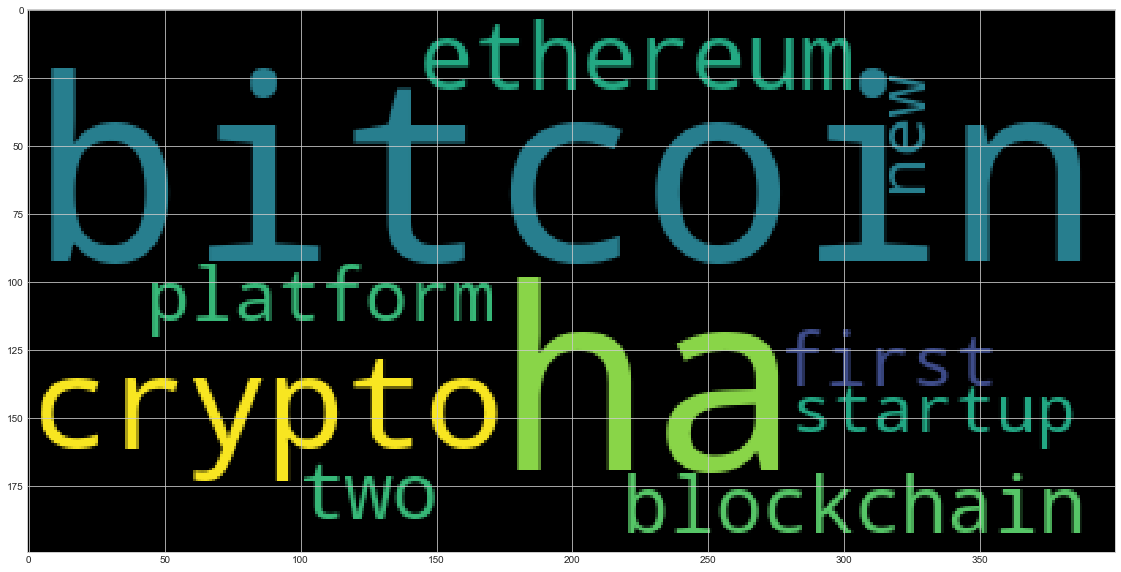

In [90]:

# Generate the Ethereum word cloud
wc = WordCloud().generate( " ".join(ethr_count["Words"].tolist()))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [91]:
import spacy
from spacy import displacy

In [92]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [98]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')
# doc = nlp(text)
# doc.user_data["title"] = "This is a title"
# displacy.serve(doc, style="ent")

## Bitcoin NER

In [97]:
# Concatenate all of the bitcoin text together
bitcoin_df["content"].str.cat()

'J.K. Rowling has been drinking a lot and you\'d better believe she has some thoughts on Bitcoin.\r\nNotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars]Yesterday, the prominent bitcoin investor Michael Terpin announced that hed filed suit against the ringleader of a SIM swap gang that hed been chasing down since 2018, following the theft of roughly … [+2243 chars]Early next week, Bitcoin is about to experience its third-ever halving, a hugely important event that could shift the balance of power within the network. Historically the event, also called the halv… [+7424 chars]Over the last few weeks all eyes in the crypto world have been glued to the halvening, a nigh-religious moment in the blockchain realm. Every once in a while, the amount of new bitcoin mined — distri… [+4849 chars]If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yoursel

In [101]:
bitext = bitcoin_df["content"].str.cat()

In [102]:
nlp(bitext)

J.K. Rowling has been drinking a lot and you'd better believe she has some thoughts on Bitcoin.
NotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars]Yesterday, the prominent bitcoin investor Michael Terpin announced that hed filed suit against the ringleader of a SIM swap gang that hed been chasing down since 2018, following the theft of roughly … [+2243 chars]Early next week, Bitcoin is about to experience its third-ever halving, a hugely important event that could shift the balance of power within the network. Historically the event, also called the halv… [+7424 chars]Over the last few weeks all eyes in the crypto world have been glued to the halvening, a nigh-religious moment in the blockchain realm. Every once in a while, the amount of new bitcoin mined — distri… [+4849 chars]If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as 

In [103]:
bitner = nlp(bitext)

In [105]:
# Run the NER processor on all of the text

# Add a title to the document
bitner.user_data["title"] = "Bitcoin NER"
displacy.render(bitner, style="ent")

In [108]:
# List all Entities
bitner.ents
for ent in bitner.ents:
    print(ent, ent.label_)

J.K. Rowling PERSON
Bitcoin GPE
The Cuckoos Calling WORK_OF_ART
Friday DATE
Michael Terpin PERSON
SIM ORG
2018 DATE
next week DATE
Bitcoin GPE
third ORDINAL
the last few weeks DATE
blockchain GPE
new bitcoin LOC
first ORDINAL
Bitcoin GPE
2009 DATE
three CARDINAL
210,000 CARDINAL
every four years DATE
Bitcoin GPE
$13 billion MONEY
the past day DATE
bitcoin GPE
more than 6% PERCENT
Thursday DATE
Bitcoin GPE
more than 100% PERCENT
March 16 DATE
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
bitcoin GPE
2012 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
+3041 GPE
2020 DATE
a big year DATE
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
B

---

## Ethereum NER

In [109]:
# Concatenate all of the ethereum text together
ethereum_df["content"].str.cat()

'Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars]For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.\r\nMagic, a… [+2450 chars]Use this to send Ether from one account to another or a smart contract address. It requires a few parameters depending on the transaction. Possible parameters include from, to, value, gas, and more.\r… [+206 chars]Some open-source groups, such as The Linux Foundation, can deal with it. Others aren\'t so fortunate. Some, such as Drupal Foundation, the Open Source Initiative (OSI), Open Source Matters (Joomla), a… [+1202 chars]With unemployment surging and businesses struggling under lockdown, millions of Americans are relying on the extra benefits payments issued 

In [111]:
ethtext = ethereum_df["content"].str.cat()

In [113]:
# Run the NER processor on all of the text
ethner = nlp(ethtext)
# Add a title to the document
ethner.user_data["title"] = "Ethereum NER"
displacy.render(ethner, style="ent")

In [115]:
# List all Entities
ethner.ents
for ent in ethner.ents:
    print(ent, ent.label_)

Andreessen ORG
Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Ether PERSON
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
millions CARDINAL
Americans NORP
$2 trillion dollar MONEY
Relief ORG
Ec ORG
the last few weeks DATE
blockchain GPE
new bitcoin LOC
crypto NORP
Dapper ORG
Libra GPE
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
$13 billion MONEY
the past day DATE
bitcoin GPE
more than 6% PERCENT
Thursday DATE
Bitcoin GPE
more than 100% PERCENT
March 16 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
first ORDINAL
blockchain GPE
2020 DATE
a big year DATE
Bitcoin GPE
Facebook PERSON
Telegram PERSON
today DATE
27 CARDINAL
Java PERSON
Jerome H. Powell PERSON
May 28, 2020 DATE
